In [2]:
import pandas as pd
from pandas import DataFrame
import  seaborn as sns
import matplotlib.pyplot as plt



# Context of the Dataset
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy.
This dataset aims to classify stars, galaxies, and quasars based on their spectral characteristics.

# Load Data

# Instructions

To install all necessary dependencies for this project run following command
python -m pip install -r requirements.txt

The data is available here: [https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

Note to run the notebook please make sure all dependencies are installed correctly and the paths to your data folder is set properly

In [3]:
path: str = r"D:\Documents\GitHub\UNI_Stellar_Classification\Data\star_classification.csv"
data: DataFrame = pd.read_csv(path)
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Feature Description
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

IDs and Metadata:
- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)


Descriptive Features of the Observation:
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS which defines a unique part of the observed sky

Target:
- class = object class (galaxy, star or quasar object)

In [4]:
feature_columns: list = ["u", "g", "r", "i", "z", "redshift", "plate", "class",]
feature_data: DataFrame = data[feature_columns]
feature_data.head()

,u,g,r,i,z,redshift,plate,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,GALAXY


## check for missing values

In [5]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   redshift  100000 non-null  float64
 6   plate     100000 non-null  int64  
 7   class     100000 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 6.1+ MB


Fortunately, this dataset contains no feature with missing data!
this means there is no need for imputation techniques such as mean, median, or regression imputation.

[Text(0.5, 1.0, 'Histogram of Target Variable')]

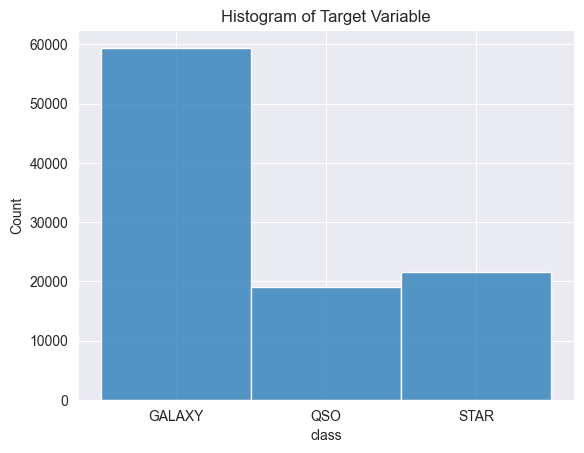

In [7]:
sns.histplot(feature_data["class"]).set(title="Distribution of Target Variable")

The above histogram shows the distribution of the target variable.
It turns out that the class Galaxy is overrepresented compared to Quasar and Star.

In [128]:
print(f"Absolute Number of Galaxy:  {len(feature_data[feature_data['class'] == 'GALAXY']):<15} Relative Share {len(feature_data[feature_data['class'] == 'GALAXY'])/ len(feature_data):2%}")
print(f"Absolute Number of Quasar:  {len(feature_data[feature_data['class'] == 'QSO']):<15} Relative Share {len(feature_data[feature_data['class'] == 'QSO'])/ len(feature_data):2%}")
print(f"Absolute Number of Star:    {len(feature_data[feature_data['class'] == 'STAR']):<15} Relative Share {len(feature_data[feature_data['class'] == 'STAR'])/ len(feature_data):2%}")

Absolute Number of Galaxy:  59445           Relative Share 59.445000%
Absolute Number of Quasar:  18961           Relative Share 18.961000%
Absolute Number of Star:    21594           Relative Share 21.594000%


It becomes visible, that there is an imbalance in the data. Almost 60% of all observations are Galaxies, while only 20% are either Quasars or Stars.
This knowledge can be used to treat the data while preprocessing and training to avoid issues due to this imbalance.

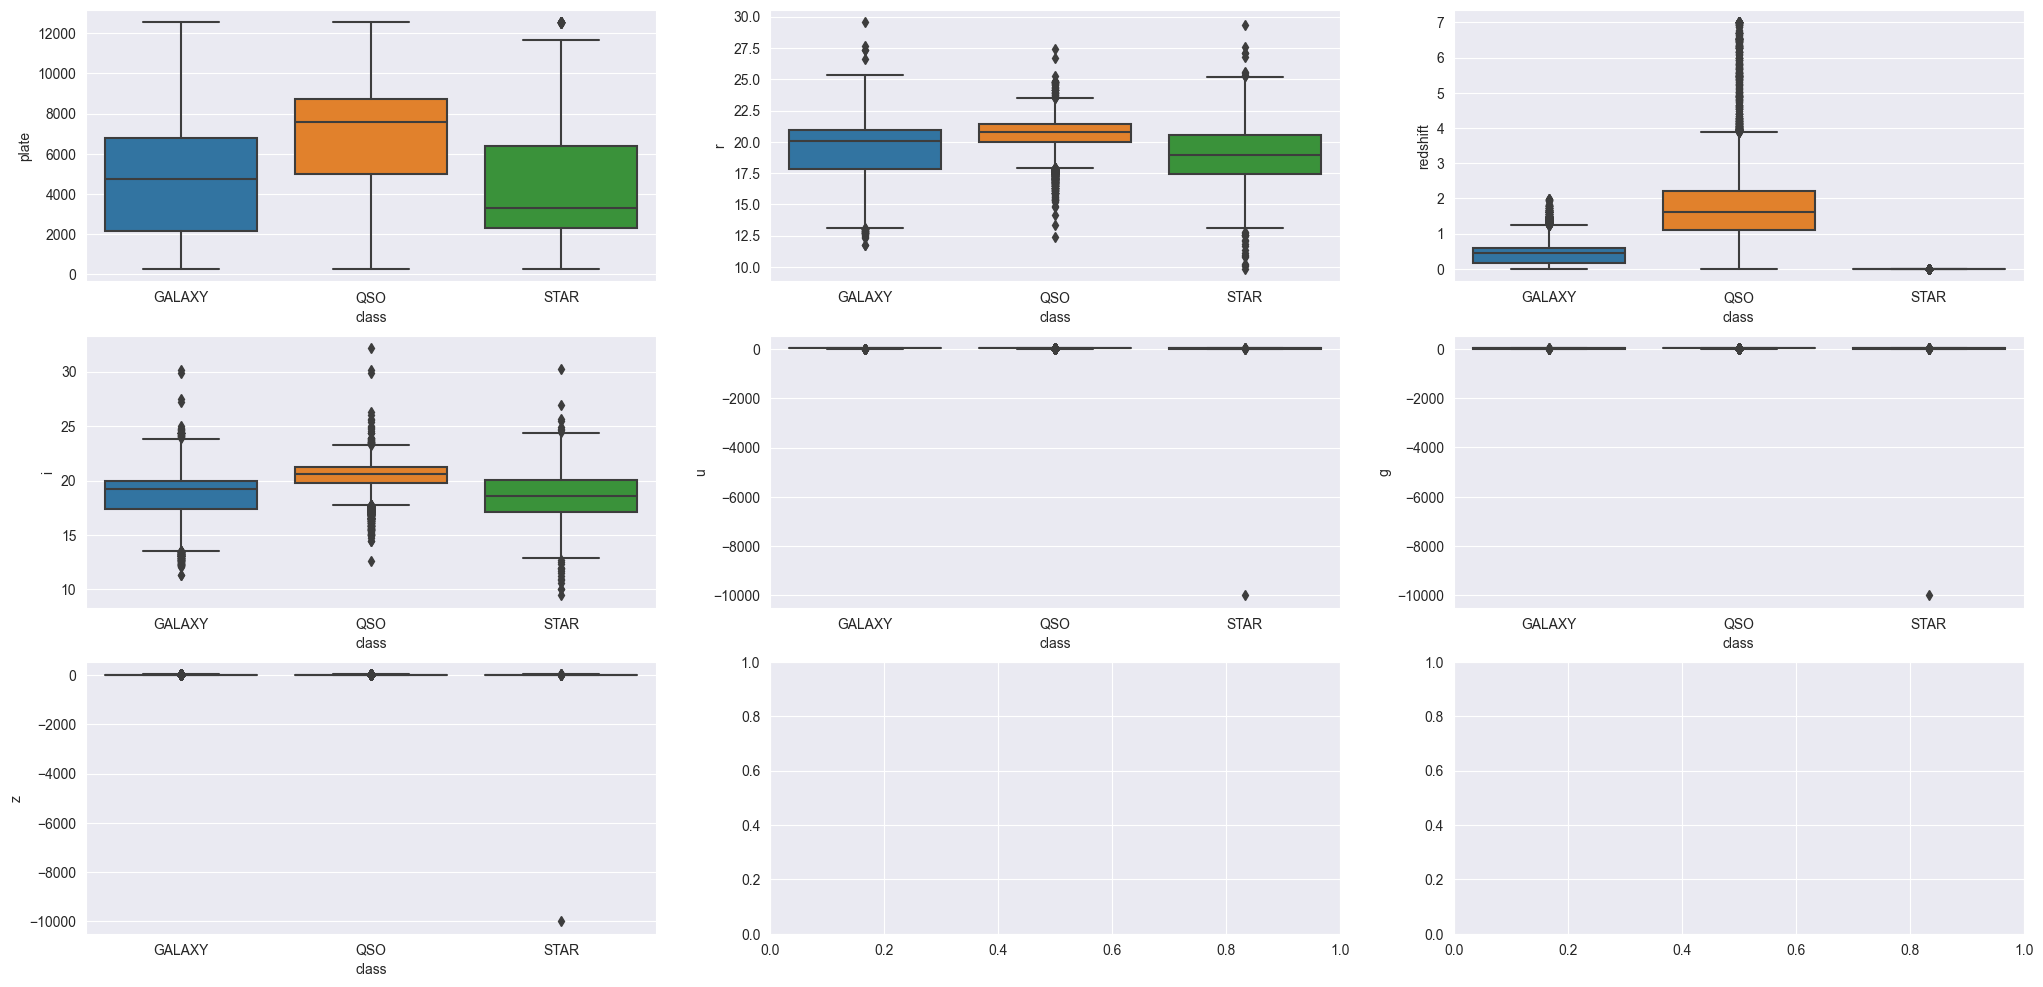

In [10]:
features_for_box = ["plate", "r", "redshift", "i", "u", "g", "z"]
fig, axes = plt.subplots(3, int(len(features_for_box)/2), figsize=(25, 12))
for row in range(3):
    for col in range(int(len(features_for_box)/2)):
        sns.boxplot(data=feature_data, x="class", y=features_for_box[(row * int(len(features_for_box)/2)) + col], ax=axes[row, col])
        if row == 2:
            break

Observing the boxplot for each feature with respect to the different classes, it turns out that for the features u, g and z there is at least one outlier that is so far apart
that the boxplot is not displayed properly.

However, for the other features we can see that for the different classes we have varying means but overlapping percentiles such that the distributions w.r.t the classes will also overlap.
Also, we can see that the range for the features r, i, redshift is very moderate between 10 and 30.

Redshift seems to have all its outliers on one side and that for stars, the redshift remain constant at 0. THis can be explained  by the fact that galaxies and Quasars are magnitudes brighter
and thus the redshift can be measured much better. What ever the reason is, we know that this feature can be a good indication for star or non-star.

Let's have a closer look at the features g, z and u since there seems to be an issue in the data

In [1]:
feature_data[["u", "g", "z"]].describe()

NameError: name 'feature_data' is not defined

In [12]:
print(f"Idx min g: {feature_data.g.idxmin()}\nIdx min u: {feature_data.u.idxmin()}\nIdx min z: {feature_data.z.idxmin()}")

Idx min g: 79543
Idx min u: 79543
Idx min z: 79543


In [13]:
feature_data.iloc[[feature_data.g.idxmin()]][["u", "g", "z"]]

,u,g,z
79543,-9999.0,-9999.0,-9999.0


In [14]:
print(f"Occurrence of negative values:\nnumber negative values in g: {len(feature_data[feature_data.g < 0])}\nnumber negative values in u: {len(feature_data[feature_data.u < 0])}\nnumber negative values in z: {len(feature_data[feature_data.z < 0])}")

Occurrence of negative values:
number negative values in g: 1
number negative values in u: 1
number negative values in z: 1


it seems that for the features u, g, and z, the row with index 79543 causes some trouble, since the value of -9999.0 seems to be far off the normal range of those features.The boxplot also show that for those three features, there is one outlier far off the others.
It is reasonable to drop this one row completely.
Of course the class STAR is underrepresented but in the context of astronomy and photometric system Ultraviolet filter (feature u), Green filter (feature g) and Infrared filter (z) quantify the amount of light in the specific spectrum and thus
negative numbers do not make sense. Also, among all observations -9999 is the only negative value in all the observations which supports the concern that this value does not provide meaningful information.

In [15]:
clean_data: DataFrame = feature_data.drop(index=feature_data.g.idxmin())
clean_data[["u", "g", "z"]].describe()

,u,g,z
count,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,18.768988
std,2.251068,2.037384,1.765982
min,10.996230,10.498200,9.612333
25%,20.352410,18.965240,17.460830
50%,22.179140,21.099930,19.004600
75%,23.687480,22.123775,19.921120
max,32.781390,31.602240,29.383740


## now that the erroneous row is removed we can also look at the distribution of the data

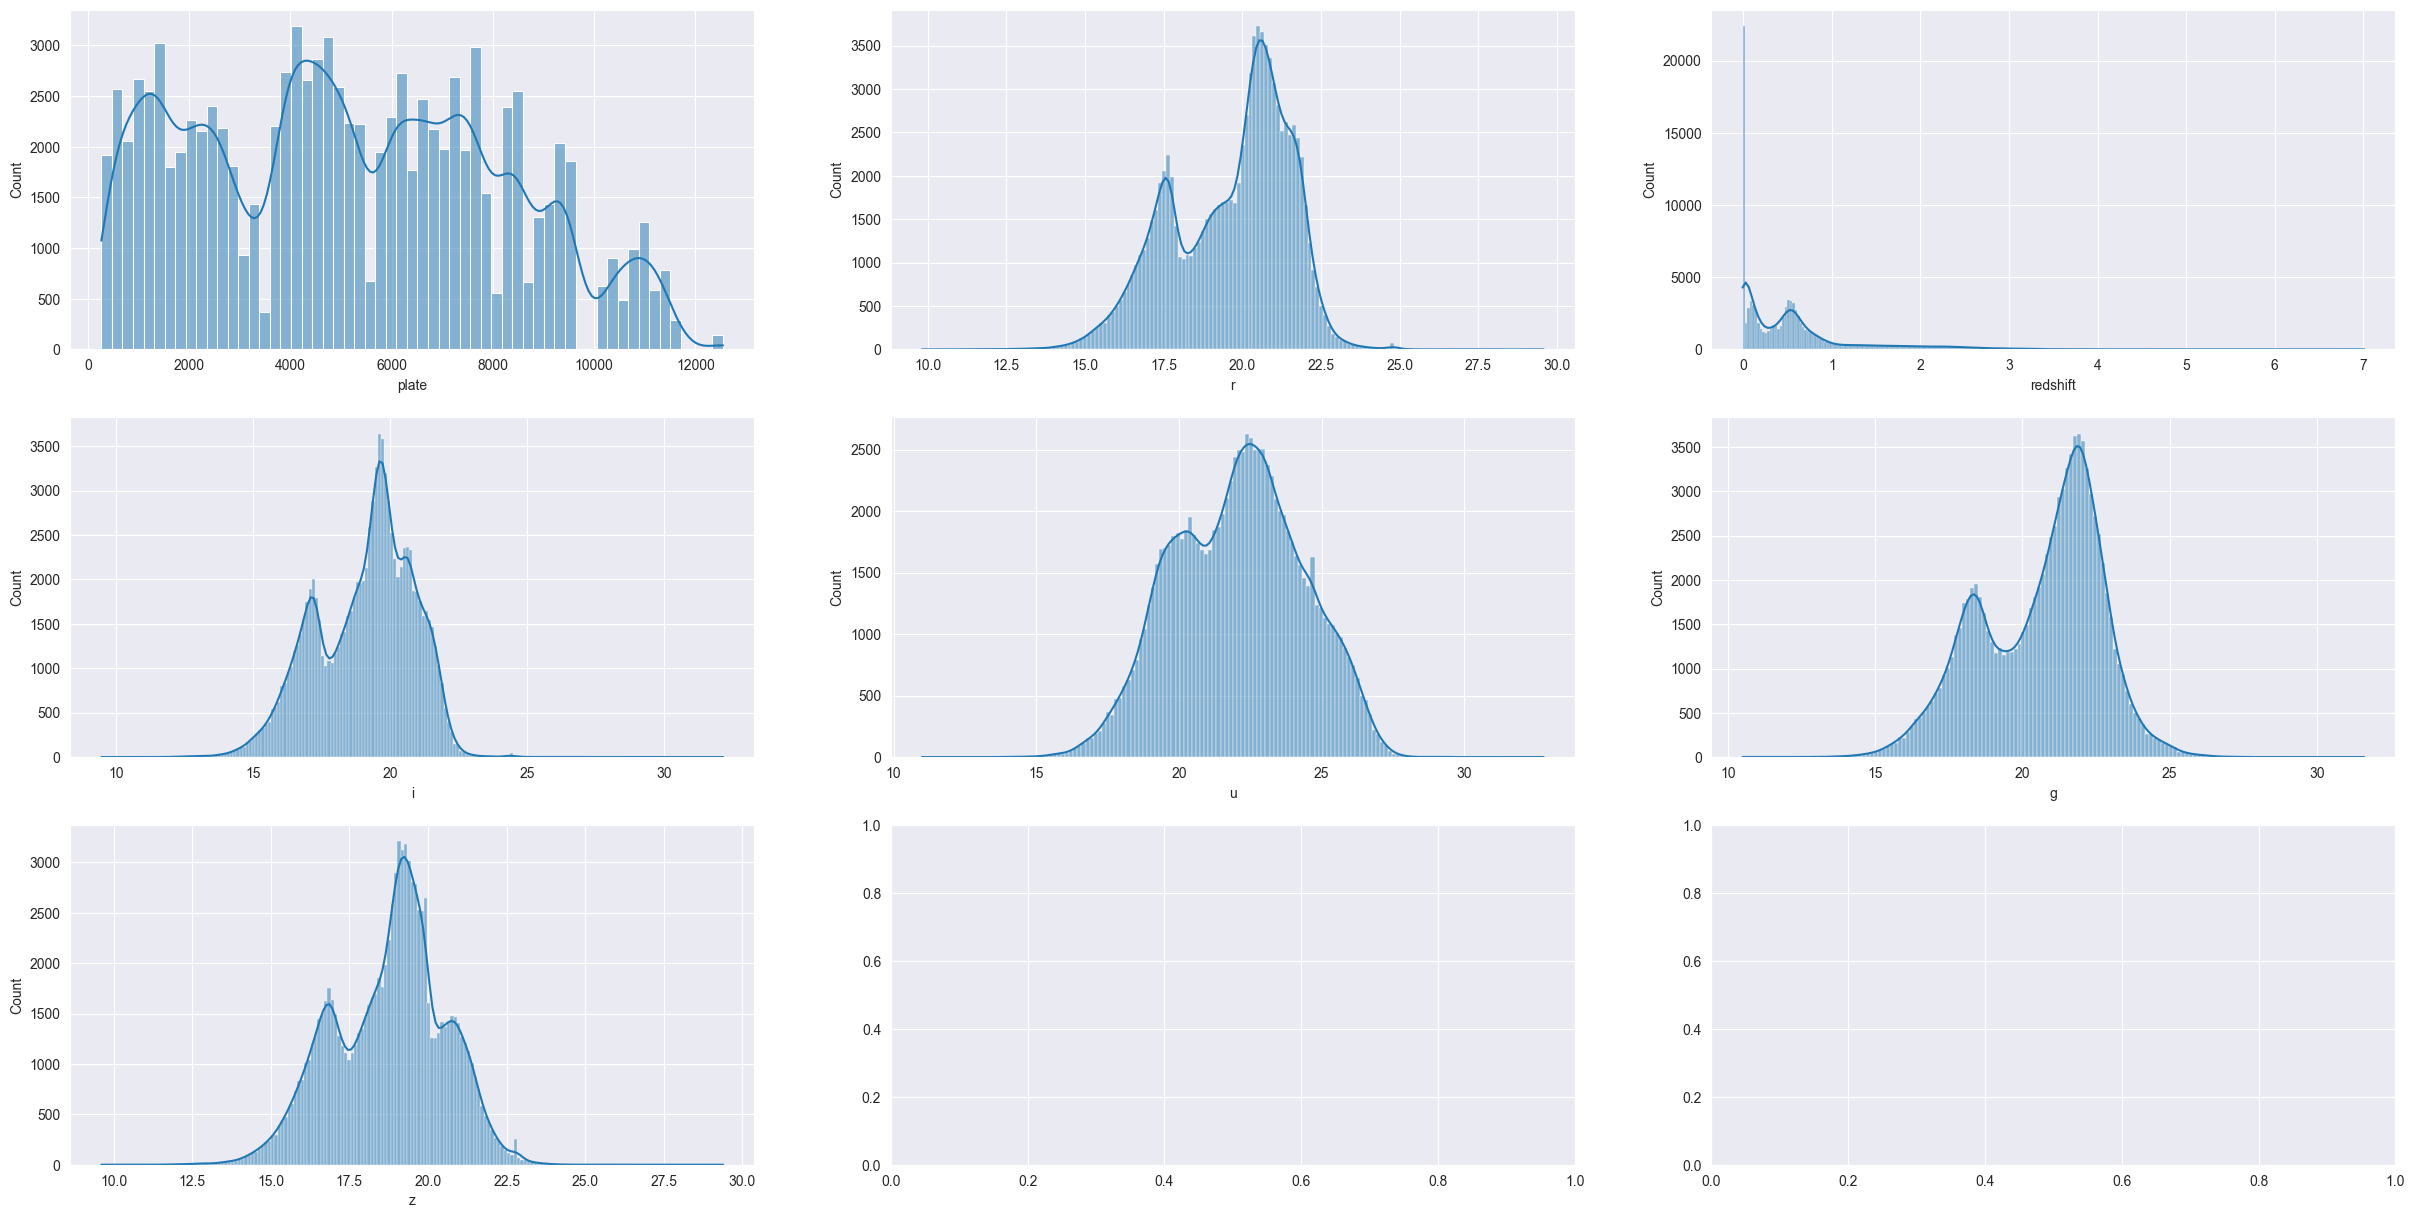

In [17]:
features_for_hist = ["plate", "r", "redshift", "i", "u", "g", "z"]
fig, axes = plt.subplots(3, int(len(features_for_hist)/2), figsize=(30,15))
for row in range(3):
    for col in range(int(len(features_for_hist)/2)):
        sns.histplot(clean_data[features_for_hist[(row * int(len(features_for_hist)/2)) + col]], ax=axes[row, col], kde=True)
        if row == 2:
            break

All the distributions look not too skewed except of the redshift that seems to have a long tail on the right.
However, they seem to be mostly multy modal with 2 or 3 peaks.
This does make sense considering that there are three distinct classes. Of course this is just an indication and must not mean that each of the peaks represent a different class.

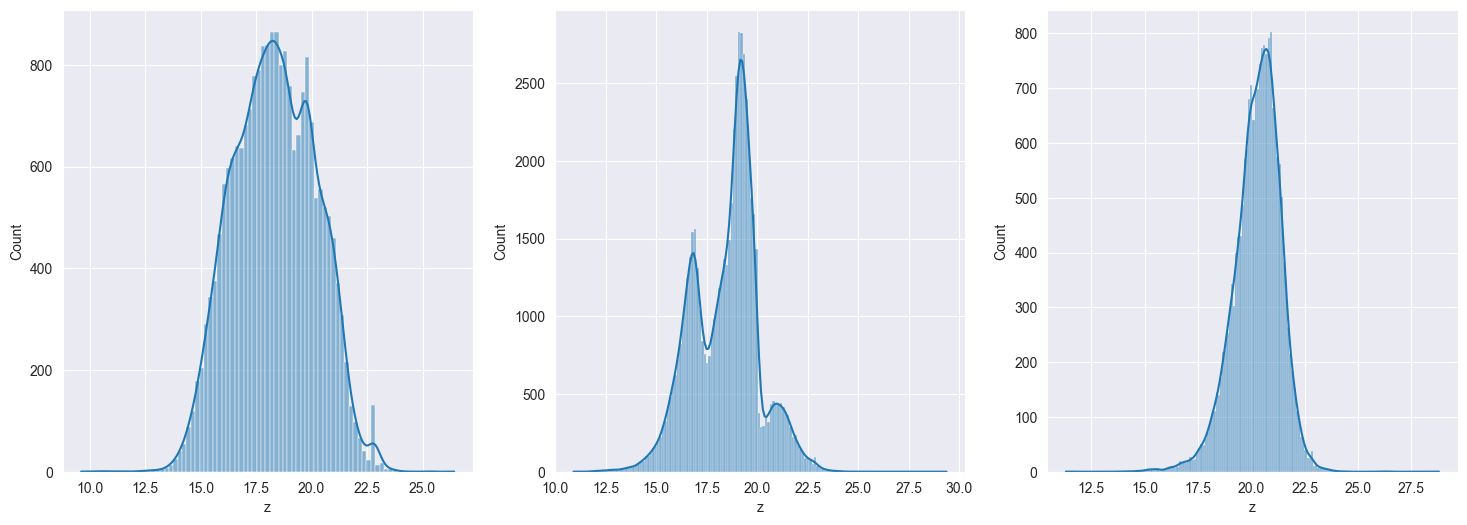

In [28]:
z_star = clean_data[clean_data["class"] == "START"]
z_galaxy = clean_data[clean_data["class"] == "GALAXY"]
z_qsa = clean_data[clean_data["class"] == "QSA"]

fig, axes = plt.subplots(1, 3, figsize=(18,6))
for col, class_name in enumerate(["STAR", "GALAXY", "QSO"]):
    sns.histplot(clean_data[clean_data["class"] == class_name]["z"], ax=axes[col], kde=True)

The above plots are the distribution of the feature Z (infrared) for each class separately, and it turns out that for STAR and QSO (Quasar), the
distribution looks much closer to a normal distribution with different means. For Galaxy however this is not the case.
This can be explained by the fact that a galaxy is a composition of various objects that send light in different waves since Stars and Quasars are single objects.

This shows us, that just from this particular feature it is possible to see a difference in the distribution of their infrared light emissions. The fact that quasars tend to emmit much higher amounts of
energy among multiple wave length could explain why the infrared value is higher for Quasars than Stars.

### Also lets have a look at the boxplot for the features that had the erroneous values

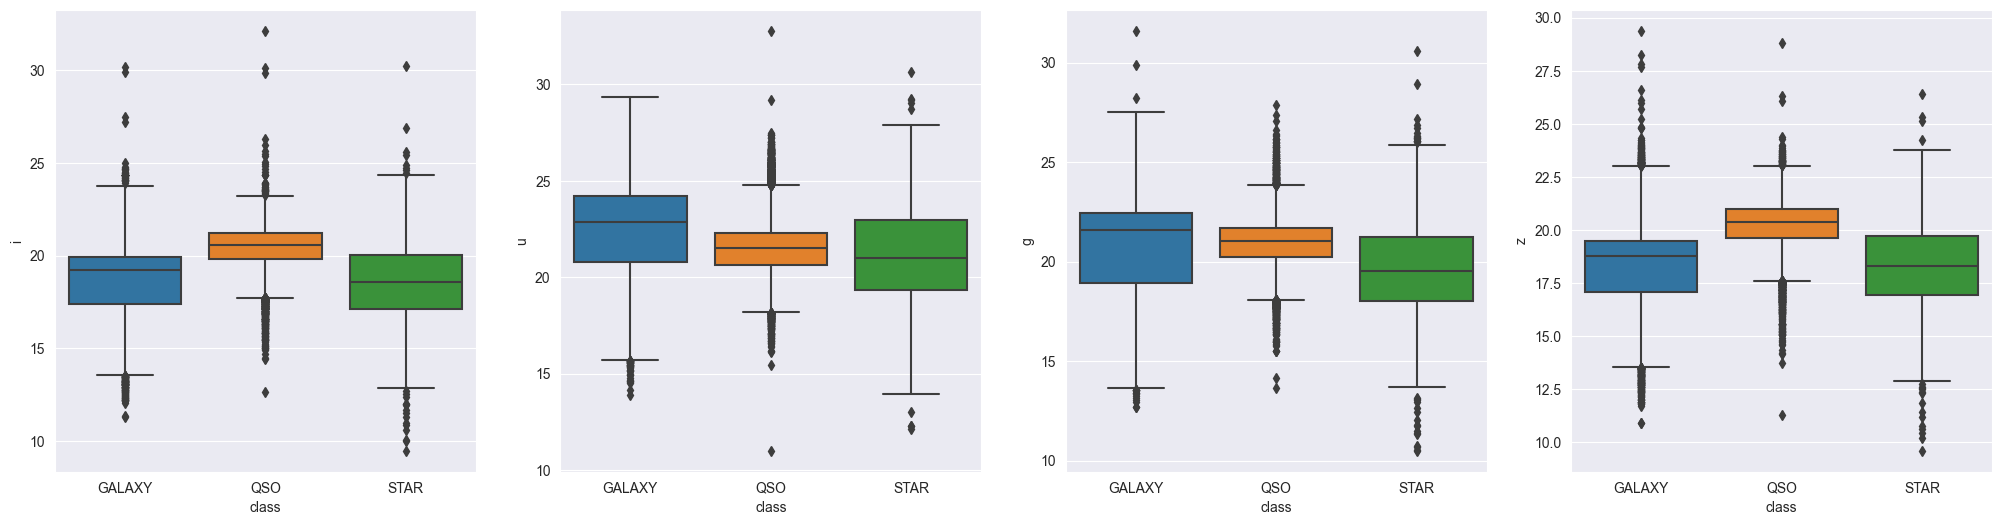

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(25, 6))
for i, col in enumerate(["i", "u", "g", "z"]):
    sns.boxplot(data=clean_data, x="class", y=col, ax=axes[i])

now the boxplot are more meaning full and fit much better in the overall context of the features they represent.

# Save Data

In [30]:
save_path: str = r"D:\Documents\GitHub\UNI_Stellar_Classification\Data\star_classification_only_features.csv"
clean_data.reset_index(inplace=True)
clean_data.to_csv(save_path)

In [31]:
clean_data.to_csv(save_path)

In [32]:
clean_data.head()

,index,u,g,r,i,z,redshift,plate,class
0,0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,GALAXY
1,1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,GALAXY
2,2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,GALAXY
3,3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,GALAXY
4,4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,GALAXY
